In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#split the dataset into training and test set
from sklearn.model_selection import train_test_split

from seaborn import heatmap
#import 

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

#import train_set.csv
dataset = pd.read_csv('train_set.tsv', sep='\t')
#the x are all the columns except the last one

# Regression

In [171]:
#d is all the columns except the second last one
d = dataset.iloc[:, :-2].values

#now put the last column into d
d = np.append(d, dataset.iloc[:, -1].values.reshape(-1, 1), axis=1)

#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
d= sc.fit_transform(d)

x = d[:, :-1]
y = d[:, -1]


#split the dataset into training and test set for regression and classification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#print the shape
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("####################")
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)





x_train shape:  (800, 35)
y_train shape:  (800,)
####################
x_test shape:  (200, 35)
y_test shape:  (200,)


Mean squared error: 0.04
Regression score score: -0.04


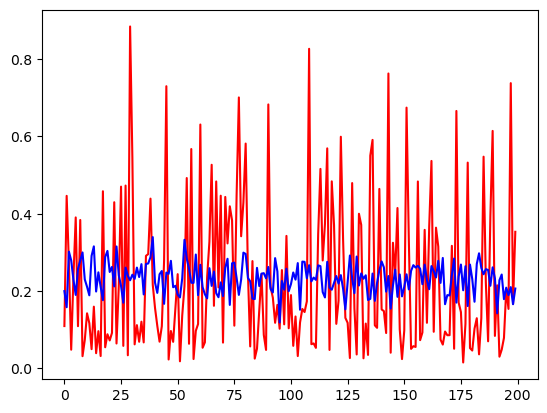

In [172]:
#use a linear regression model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

#predict the test set results
y_pred = regressor.predict(x_test)

plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')

#calculate the mean squared error and the regression score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Regression score score: %.2f' % r2_score(y_test, y_pred))






mean_absolute_percentage_error:  1.7102880836793872
Mean squared error: 0.04
Regression score score: 0.03
mean_absolute_percentage_error:  1.7102880836793872


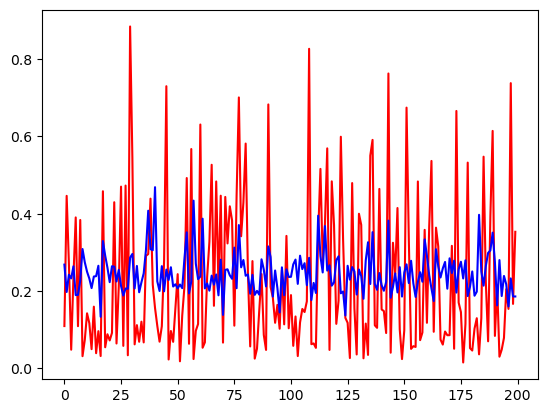

In [173]:
#import random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(x_train, y_train)

#predict the test set results
y_pred = regressor.predict(x_test)

plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')

#compute the accuracy with mape

print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test, y_pred))

#compute the mean squared error 
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

#compute the regression score
print('Regression score score: %.2f' % r2_score(y_test, y_pred))


print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test, y_pred))






type:  linear
type:  poly
type:  rbf
type:  sigmoid
bestScoreRBFSVM:  0.07858559570456414
RBFSVM configuration:  [0.1, 0.1, 'sigmoid', 0, 0]
bestScorePolySVM:  0.11286153051177805
PolySVM configuration:  [2, 0.3, 0.3, 'poly', 0]
bestScoreLinearSVM:  -0.03258754205300507
LinearSVM configuration:  [2, 0.3, 0.3, 'poly', 0]
bestScoreSigmoidSVM:  -0.02565776514107565
SigmoidSVM configuration:  [0.1, 0.1, 'sigmoid', 0, 0]
mean_absolute_percentage_error:  1.365735246637188
Mean squared error: 0.03
Regression score score: 0.11


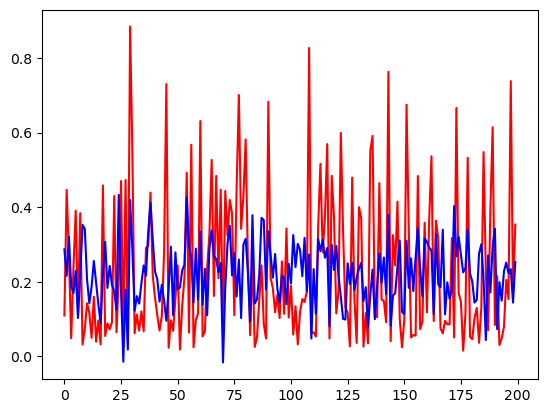

In [174]:
#use an SVM
from sklearn.svm import SVR
#import cross validation


configuration = [0, 0, 0, 0, 0]

bestScoreRBFSVM = -100
bestScorePolySVM = -100
bestScoreLinearSVM = -100
bestScoreSigmoidSVM = -100
configurationLinearSVM = 0
configurationPolySVM = 0
configurationRBFSVM = 0
configurationSigmoidSVM = 0


for type in ['linear', 'poly', 'rbf', 'sigmoid']:
    print("type: ", type)
    if type == 'rbf':
        configuration = [0, 0, 0, 0, 0]
        for gamma in [0.1, 0.2, 0.3, 0.4, 0.5]:
            for C in [0.1, 0.2, 0.3, 0.4, 0.5]:
                regressor = SVR(kernel = type, gamma = gamma, C = C)
                regressor.fit(x_train, y_train)
                y_pred = regressor.predict(x_test)
                score = r2_score(y_test, y_pred)
                if score > bestScoreRBFSVM:
                    bestScoreRBFSVM = score
                    configuration[0] = gamma
                    configuration[1] = C
                    configuration[2] = type
                    configurationRBFSVM = configuration
    elif type == 'poly':
        for degree in [2, 3, 4, 5, 6]:
            for gamma in [0.1, 0.2, 0.3, 0.4, 0.5]:
                for C in [0.1, 0.2, 0.3, 0.4, 0.5]:
                    regressor = SVR(kernel = type, degree = degree, gamma = gamma, C = C)
                    regressor.fit(x_train, y_train)
                    y_pred = regressor.predict(x_test)
                    score = r2_score(y_test, y_pred)
                    if score > bestScorePolySVM:
                        bestScorePolySVM = score
                        configuration[0] = degree
                        configuration[1] = gamma
                        configuration[2] = C
                        configuration[3] = type
                        configurationPolySVM = configuration
    elif type == 'linear':
        for C in [0.1, 0.2, 0.3, 0.4, 0.5]:
            regressor = SVR(kernel = type, C = C)
            regressor.fit(x_train, y_train)
            y_pred = regressor.predict(x_test)
            score = r2_score(y_test, y_pred)
            if score > bestScoreLinearSVM:
                bestScoreLinearSVM = score
                configuration[0] = C
                configuration[1] = type
                configurationLinearSVM = configuration
    elif type == 'sigmoid':
        for gamma in [0.1, 0.2, 0.3, 0.4, 0.5]:
            for C in [0.1, 0.2, 0.3, 0.4, 0.5]:
                regressor = SVR(kernel = type, gamma = gamma, C = C)
                regressor.fit(x_train, y_train)
                y_pred = regressor.predict(x_test)
                score = r2_score(y_test, y_pred)
                if score > bestScoreSigmoidSVM:
                    bestScoreSigmoidSVM = score
                    configuration[0] = gamma
                    configuration[1] = C
                    configuration[2] = type
                    configurationSigmoidSVM = configuration


print("bestScoreRBFSVM: ", bestScoreRBFSVM)
print("RBFSVM configuration: ", configurationRBFSVM)
print("bestScorePolySVM: ", bestScorePolySVM)
print("PolySVM configuration: ", configurationPolySVM)
print("bestScoreLinearSVM: ", bestScoreLinearSVM)
print("LinearSVM configuration: ", configurationLinearSVM)
print("bestScoreSigmoidSVM: ", bestScoreSigmoidSVM)
print("SigmoidSVM configuration: ", configurationSigmoidSVM)

#use the best poly svm
regressor = SVR(kernel = 'poly', degree = configurationPolySVM[0], gamma = configurationPolySVM[1], C = configurationPolySVM[2])
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')

#compute the accuracy with mape

print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test, y_pred))

#compute the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

#regression report

print('Regression score score: %.2f' % r2_score(y_test, y_pred))








# Classification

In [175]:
x = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values




#minmax normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)

#use SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=2)
x, y = sm.fit_resample(x, y)



#split the dataset into training and test set for regression and classification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#uso SMOTE per bilanciare il dataset
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42, k_neighbors=2)
# x_train, y_train = sm.fit_resample(x_train, y_train)




#print the shape
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("####################")
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)




x_train shape:  (2152, 35)
y_train shape:  (2152,)
####################
x_test shape:  (538, 35)
y_test shape:  (538,)


              precision    recall  f1-score   support

           0       0.42      0.32      0.36       104
           1       0.54      0.53      0.53       106
           2       0.71      0.85      0.77        92
           3       0.86      0.93      0.89       117
           4       1.00      1.00      1.00       119

    accuracy                           0.73       538
   macro avg       0.71      0.73      0.71       538
weighted avg       0.72      0.73      0.72       538

Accuracy: 0.74 (+/- 0.02)


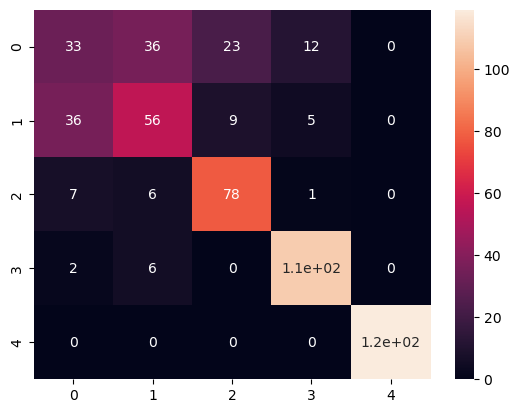

In [176]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisionTree.fit(x_train, y_train)

#predict the test set results
y_pred = decisionTree.predict(x_test)


cm = confusion_matrix(y_test, y_pred)

heatmap(cm, annot=True)


print(classification_report(y_test, y_pred))

#K-Fold Cross Validation

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores = cross_val_score(decisionTree, x, y, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))




In [177]:
#use kfold cross validation

accuracies = cross_val_score(estimator = decisionTree, X = x_train, y = y_train, cv = 10)
print("KFOLD: accuracies: ", accuracies)
print("KFOLD: accuracies mean: ", accuracies.mean())
print("KFOLD: accuracies standard deviation: ", accuracies.std())


#test the model on the test set and compute the accuracy

y_pred = decisionTree.predict(x_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred))



KFOLD: accuracies:  [0.74537037 0.74074074 0.74418605 0.75348837 0.74418605 0.70697674
 0.74883721 0.73023256 0.74418605 0.75813953]
KFOLD: accuracies mean:  0.7416343669250646
KFOLD: accuracies standard deviation:  0.013528712057387773
accuracy_score:  0.7342007434944238


type:  rbf
Accuracy: 0.51 (+/- 0.02)
Accuracy: 0.55 (+/- 0.03)
Accuracy: 0.59 (+/- 0.03)
Accuracy: 0.61 (+/- 0.03)
Accuracy: 0.63 (+/- 0.02)
Accuracy: 0.57 (+/- 0.03)
Accuracy: 0.65 (+/- 0.02)
Accuracy: 0.68 (+/- 0.02)
Accuracy: 0.70 (+/- 0.02)
Accuracy: 0.71 (+/- 0.02)
Accuracy: 0.63 (+/- 0.02)
Accuracy: 0.69 (+/- 0.03)
Accuracy: 0.72 (+/- 0.02)
Accuracy: 0.74 (+/- 0.02)
Accuracy: 0.76 (+/- 0.02)
Accuracy: 0.66 (+/- 0.02)
Accuracy: 0.72 (+/- 0.03)
Accuracy: 0.75 (+/- 0.02)
Accuracy: 0.77 (+/- 0.02)
Accuracy: 0.79 (+/- 0.02)
Accuracy: 0.67 (+/- 0.02)
Accuracy: 0.73 (+/- 0.03)
Accuracy: 0.77 (+/- 0.02)
Accuracy: 0.79 (+/- 0.02)
Accuracy: 0.81 (+/- 0.02)
type:  poly
Accuracy: 0.43 (+/- 0.02)
Accuracy: 0.48 (+/- 0.03)
Accuracy: 0.49 (+/- 0.02)
Accuracy: 0.50 (+/- 0.03)
Accuracy: 0.51 (+/- 0.02)
Accuracy: 0.48 (+/- 0.03)
Accuracy: 0.50 (+/- 0.03)
Accuracy: 0.51 (+/- 0.02)
Accuracy: 0.52 (+/- 0.03)
Accuracy: 0.53 (+/- 0.03)
Accuracy: 0.49 (+/- 0.02)
Accuracy: 0.51 (+/- 0.02)
Accuracy: 0.53 

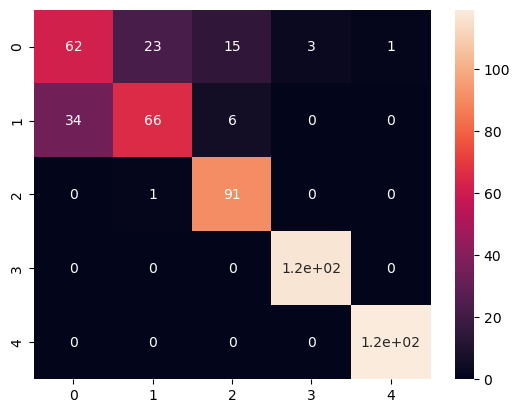

In [150]:
from sklearn.svm import SVC

configuration = [0, 0, 0, 0, 0]


for type in ['rbf', 'poly', 'sigmoid', 'linear']:
    print("type: ", type)
    if type == 'rbf':
        for gamma in [0.1, 0.2, 0.3, 0.4, 0.5]:
            for C in [0.1, 0.2, 0.3, 0.4, 0.5]:
                svm = SVC(kernel = type, random_state = 0, gamma=gamma, C=C)
                scores = cross_val_score(svm, x, y, cv=cv)
                print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
                if scores.mean() > configuration[4]:
                    configuration[4] = scores.mean()
                    configuration[0] = type
                if type == 'rbf':
                        configuration[1] = 0
                        configuration[2] = gamma
                        configuration[3] = C
                elif type == 'poly':
                    configuration[1] = degree
                    configuration[2] = gamma
                    configuration[3] = C
                elif type == 'sigmoid':
                    configuration[1] = 0
                    configuration[2] = gamma
                    configuration[3] = C
                elif type == 'linear':
                    configuration[1] = 0
                    configuration[2] = 0
                    configuration[3] = C
    elif type == 'poly':
        for degree in [1, 2, 3, 4, 5]:
            for gamma in [0.1, 0.2, 0.3, 0.4, 0.5]:
                for C in [0.1, 0.2, 0.3, 0.4, 0.5]:
                    svm = SVC(kernel = type, random_state = 0, degree=degree, gamma=gamma, C=C)
                    scores = cross_val_score(svm, x, y, cv=cv)
                    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
                    if scores.mean() > configuration[4]:
                        configuration[4] = scores.mean()
                        configuration[0] = type
                        if type == 'rbf':
                            configuration[1] = 0
                            configuration[2] = gamma
                            configuration[3] = C
                        elif type == 'poly':
                            configuration[1] = degree
                            configuration[2] = gamma
                            configuration[3] = C
                        elif type == 'sigmoid':
                            configuration[1] = 0
                            configuration[2] = gamma
                            configuration[3] = C
                        elif type == 'linear':
                            configuration[1] = 0
                            configuration[2] = 0
                            configuration[3] = C
    elif type == 'sigmoid':
        for gamma in [0.1, 0.2, 0.3, 0.4, 0.5]:
            for C in [0.1, 0.2, 0.3, 0.4, 0.5]:
                svm = SVC(kernel = type, random_state = 0, gamma=gamma, C=C)
                scores = cross_val_score(svm, x, y, cv=cv)
                print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
                if scores.mean() > configuration[4]:
                    configuration[4] = scores.mean()
                    configuration[0] = type
                    if type == 'rbf':
                        configuration[1] = 0
                        configuration[2] = gamma
                        configuration[3] = C
                    elif type == 'poly':
                        configuration[1] = degree
                        configuration[2] = gamma
                        configuration[3] = C
                    elif type == 'sigmoid':
                        configuration[1] = 0
                        configuration[2] = gamma
                        configuration[3] = C
                    elif type == 'linear':
                        configuration[1] = 0
                        configuration[2] = 0
                        configuration[3] = C
    elif type == 'linear':
        for C in [0.1, 0.2, 0.3, 0.4, 0.5]:
            svm = SVC(kernel = type, random_state = 0, C=C)
    #use kfold cross validation
            scores = cross_val_score(svm, x, y, cv=cv)
            print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
            if scores.mean() > configuration[4]:
                configuration[4] = scores.mean()
                configuration[0] = type
                if type == 'rbf':
                    configuration[1] = 0
                    configuration[2] = gamma
                    configuration[3] = C
                elif type == 'poly':
                    configuration[1] = degree
                    configuration[2] = gamma
                    configuration[3] = C
                elif type == 'sigmoid':
                    configuration[1] = 0
                    configuration[2] = gamma
                    configuration[3] = C
                elif type == 'linear':
                    configuration[1] = 0
                    configuration[2] = 0
                    configuration[3] = C

    
    

    
print("configuration: ", configuration)

#create the model with the best configuration
svm = SVC(kernel = configuration[0], random_state = 0, degree=configuration[1], gamma=configuration[2], C=configuration[3])
svm.fit(x_train, y_train)

#predict the test set results
y_pred = svm.predict(x_test)

#compute the kfold cross validation

accuracies = cross_val_score(estimator = svm, X = x, y = y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

#compute the report

print(classification_report(y_test, y_pred))

#confusion matrix

cm = confusion_matrix(y_test, y_pred)

from seaborn import heatmap
heatmap(cm, annot=True)

                    
            


Accuracy: 0.81 (+/- 0.02)
config:  [10, 0.810656753407683]
Accuracy: 0.83 (+/- 0.02)
config:  [20, 0.8309789343246592]
Accuracy: 0.84 (+/- 0.02)
config:  [30, 0.8433705080545228]
Accuracy: 0.85 (+/- 0.03)
config:  [40, 0.8459727385377944]
Accuracy: 0.85 (+/- 0.03)
config:  [50, 0.8524163568773234]
Accuracy: 0.85 (+/- 0.03)
config:  [60, 0.853903345724907]
Accuracy: 0.86 (+/- 0.02)
config:  [70, 0.857372986369269]
Accuracy: 0.86 (+/- 0.02)
Accuracy: 0.86 (+/- 0.02)
config:  [90, 0.8583643122676581]
config:  [90, 0.8583643122676581]
Accuracy: 0.86 (+/- 0.02)
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       104
           1       0.81      0.68      0.74       106
           2       0.94      0.98      0.96        92
           3       0.99      1.00      1.00       117
           4       1.00      1.00      1.00       119

    accuracy                           0.89       538
   macro avg       0.89      0.89      0.89       538
wei

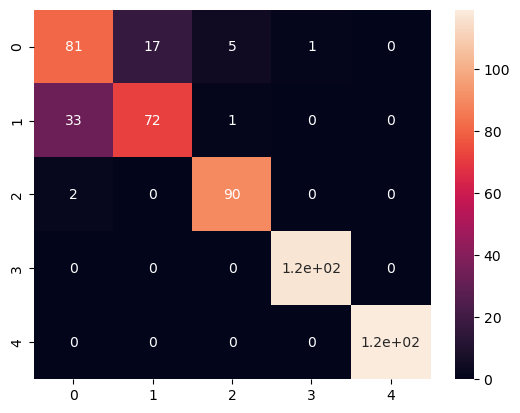

In [179]:
#use random forest classifier
from sklearn.ensemble import RandomForestClassifier

config = [0, 0]
scoress = None
for n_estimators in range(10, 100, 10):
    randomForest = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 0)
    randomForest.fit(x_train, y_train)

    #predict the test set results
    y_pred = randomForest.predict(x_test)

    #compute the report
    #print(classification_report(y_test, y_pred))

    #K-Fold Cross Validation

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    scores = cross_val_score(randomForest, x, y, cv=cv)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    if scores.mean() > config[1]:
        config[0] = n_estimators
        config[1] = scores.mean()
        print("config: ", config)
        scoress = scores

print("config: ", config)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoress.mean(), scoress.std() * 2))

randomForest = RandomForestClassifier(n_estimators = config[0], criterion = 'entropy', random_state = 0)
randomForest.fit(x_train, y_train)

#predict the test set results
y_pred = randomForest.predict(x_test)

#compute the accuracy with confusion matrix

cm = confusion_matrix(y_test, y_pred)

heatmap(cm, annot=True)

#compute the report

print(classification_report(y_test, y_pred))


In [168]:
#use KNN
from sklearn.neighbors import KNeighborsClassifier

bestConfig = [0, 0, 0, 0, 0, 0]

for n_neighbors in range(1, 10):
    for weights in ['uniform', 'distance']:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            for leaf_size in range(10, 100, 10):
                for p in range(1, 5):
                    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)
                    knn.fit(x_train, y_train)

                    #predict the test set results
                    y_pred = knn.predict(x_test)

                    #compute the accuracy with accuracy score
                    from sklearn.metrics import accuracy_score
                    accuracy = accuracy_score(y_test, y_pred)
                    
                    if accuracy > bestConfig[0]:
                        bestConfig[0] = accuracy
                        bestConfig[1] = n_neighbors
                        bestConfig[2] = weights
                        bestConfig[3] = algorithm
                        bestConfig[4] = leaf_size
                        bestConfig[5] = p
print("bestConfig: ", bestConfig)
#create the best knn classifier
knn = KNeighborsClassifier(n_neighbors = bestConfig[1], weights=bestConfig[2], algorithm=bestConfig[3], leaf_size=bestConfig[4], p=bestConfig[5])
knn.fit(x_train, y_train)

#predict the test set results
y_pred = knn.predict(x_test)

#compute the accuracy with accuracy score

accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)

#compute the report

print(classification_report(y_test, y_pred))

#K-Fold Cross Validation

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores = cross_val_score(knn, x, y, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#confusion matrix

bestConfig:  [0.8327137546468402, 1, 'uniform', 'auto', 10, 1]
accuracy:  0.8327137546468402
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       104
           1       0.72      0.78      0.75       106
           2       0.76      1.00      0.86        92
           3       0.88      1.00      0.94       117
           4       1.00      1.00      1.00       119

    accuracy                           0.83       538
   macro avg       0.82      0.83      0.81       538
weighted avg       0.83      0.83      0.81       538

Accuracy: 0.82 (+/- 0.02)


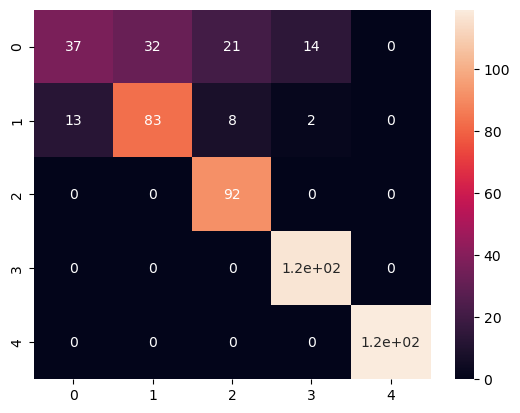

In [169]:

cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
from seaborn import heatmap
heatmap(cm, annot=True)